In [ ]:
# zimport sys
# import torch
# import torchaudio
# import numpy as np
# import scipy.signal
# import librosa

# # Add the necessary paths to sys.path
# sys.path.append("/content/drive/MyDrive/spiking-fullsubnet")
# sys.path.append("/content/drive/MyDrive/spiking-fullsubnet/recipes/intel_ndns/spiking_fullsubnet_freeze_phase/")

# # Import relevant modules from uploaded files
# from audiozen.acoustics.audio_feature import load_wav, stft, mag_phase, loudness_rms_norm, norm_amplitude, istft
# from audiozen.acoustics.filterbank import bark_filter_bank
# from efficient_spiking_neuron import MemoryState, efficient_spiking_neuron
# from audiozen.models.spiking_fullsubnet.modeling_spiking_fullsubnet import SequenceModel, SubBandSequenceModel, SubbandModel, SpikingFullSubNet
# from audiozen.models.spiking_fullsubnet.discriminator import LearnableSigmoid, Discriminator
# from audiozen.models.spiking_fullsubnet.efficient_spiking_neuron import GSULayer, StackedGSU, GSUCell
# from recipes.intel_ndns.spiking_fullsubnet_freeze_phase.model_low_freq import Separator, SequenceModel, BaseModel, SubBandSequenceWrapper, SubbandModel
# from recipes.intel_ndns.spiking_fullsubnet_freeze_phase.efficient_spiking_neuron import GSULayer, StackedGSU, GSUCell
# from recipes.intel_ndns.spiking_fullsubnet_freeze_phase.discriminator import LearnableSigmoid, Discriminator

# def preprocess_audio(audio_path):
#     """
#     Load and preprocess the audio file.
#     """
#     print(f"Processing audio: {audio_path}")
#     waveform = load_wav(audio_path, sr=16000)

#     if waveform.ndim == 1:
#         waveform = np.expand_dims(waveform, axis=0)  # Convert [T] → [1, T]

#     waveform = torch.tensor(waveform, dtype=torch.float32)
#     return waveform

# def load_spiking_fullsubnet():
#     """
#     Load the pretrained Separator model.
#     """
#     model = Separator(
#         sr=16000, fdrc=0.5, n_fft=512, fb_freqs=64, hop_length=128, win_length=512,
#         num_freqs=256, sequence_model="GSU", fb_hidden_size=320, fb_output_activate_function=False,
#         freq_cutoffs=[32, 128, 192], sb_df_orders=[5, 3, 1, 1], sb_num_center_freqs=[2, 4, 32, 64],
#         sb_num_neighbor_freqs=[15, 15, 15, 15], fb_num_center_freqs=[2, 4, 32, 64], fb_num_neighbor_freqs=[0, 0, 0, 0],
#         sb_hidden_size=256, sb_output_activate_function=False, norm_type="offline_laplace_norm",
#         shared_weights=True, bn=True,
#     )
#     model_path = "/content/drive/MyDrive/spiking-fullsubnet/model_zoo/intel_ndns/spike_fsb/baseline_l/checkpoints/latest/pytorch_model.bin"
#     state_dict = torch.load(model_path, map_location="cpu")
#     if "model_state_dict" in state_dict:
#         state_dict = state_dict["model_state_dict"]
#     model.load_state_dict(state_dict, strict=False)
#     model.eval()
#     return model

# def post_process_audio(audio, sample_rate):
#     """
#     Apply a simple high-frequency emphasis filter to restore speech details.
#     """
#     pre_emphasis = 0.95
#     emphasized_audio = np.append(audio[0], audio[1:] - pre_emphasis * audio[:-1])
#     filtered_audio = scipy.signal.wiener(emphasized_audio)
#     return filtered_audio

# def run_inference(audio_path):
#     """
#     Run inference on the input audio file.
#     """
#     waveform = preprocess_audio(audio_path)
#     model = load_spiking_fullsubnet()
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     model = model.to(device)
#     waveform = waveform.to(device)

#     with torch.no_grad():
#         enhanced_y, _, _, _ = model(waveform)

#     enhanced_y = enhanced_y.cpu().squeeze().numpy()
#     enhanced_y = post_process_audio(enhanced_y, 16000)
#     enhanced_y = torch.tensor(enhanced_y).unsqueeze(0)
#     return enhanced_y, 16000

# def save_and_play_audio(waveform, sample_rate, output_path="enhanced_audio.wav"):
#     """
#     Save and play the enhanced audio.
#     """
#     print(f"Waveform shape before reshaping: {waveform.shape}")

#     if waveform.ndim == 1:
#         waveform = waveform.unsqueeze(0)
#     elif waveform.ndim == 3:
#         waveform = waveform.squeeze(0)

#     print(f"Waveform shape after reshaping: {waveform.shape}")
#     torchaudio.save(output_path, waveform, sample_rate)
#     print(f"Enhanced audio saved to {output_path}")

#     from IPython.display import Audio
#     return Audio(output_path)

# def main(audio_path):
#     """
#     Main function to run the pipeline.
#     """
#     enhanced_waveform, sample_rate = run_inference(audio_path)
#     save_and_play_audio(enhanced_waveform, sample_rate)

# audio_path = "/content/drive/MyDrive/noisy_half1/p258_314.wav"
# main(audio_path)


In [ ]:
!pip install audiozen --recursive


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --recursive


In [1]:
!pip install pesq pystoi

  Preparing metadata (setup.py) ... done
  Created wheel for pesq: filename=pesq-0.0.4-cp311-cp311-linux_x86_64.whl size=274948 sha256=371bad7fe02437435ce453bd318b7b7f5c0a22fededdf49c87930e0ae8ffd5c3
  Stored in directory: /root/.cache/pip/wheels/ae/f1/23/2698d0bf31eec2b2aa50623b5d93b6206c49c7155d0e31345d
Successfully built pesq


In [2]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.6 MB/s eta 0:00:00


In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import sys
import torch
import torchaudio
import numpy as np
import librosa
import os
# Add necessary paths to sys.path
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet")
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet/audiozen")
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet/recipes/intel_ndns/spiking_fullsubnet_freeze_phase/")

In [ ]:
import os
print(os.path.exists("/content/drive/MyDrive/spiking-fullsubnet/audiozen"))  # Should print True
print(os.listdir("/content/drive/MyDrive/spiking-fullsubnet"))  # Should contain 'audiozen'
print(os.listdir("/content/drive/MyDrive/spiking-fullsubnet/audiozen"))  # Should list .py files


True
['CODE_OF_CONDUCT.md', 'CONTRIBUTING.md', 'CHANGELOG.md', '.gitignore', 'README.md', 'LICENSE', 'Spiking-FullSubNet.pdf', 'requirements.txt', 'pyproject.toml', 'notebooks', '.vscode', '.github', 'docs', 'tools', 'recipes', '.git', 'audiozen', 'model_zoo', 'tests', 'test_audio']
['config_loader.py', 'constant.py', 'trainer_utils.py', 'debug_utils.py', 'utils.py', 'lr_scheduler.py', 'logger.py', '__init__.py', 'trainer.py', 'metric.py', 'loss.py', 'optimization.py', 'pit.py', 'external', 'models', 'dataset', 'acoustics', '__pycache__']


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet")
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet/audiozen")

# Try importing again
import audiozen
print(audiozen.__file__)  # Should print the path if recognized


ModuleNotFoundError: No module named 'audiozen'

In [ ]:
!pip install -e /content/drive/MyDrive/spiking-fullsubnet

Obtaining file:///content/drive/MyDrive/spiking-fullsubnet
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for audiozen (pyproject.toml) ... done
  Created wheel for audiozen: filename=audiozen-0.0.1-py3-none-any.whl size=4180 sha256=87f171fed8942a5d1cdedac2cc53337746f26e48ec97a34d60cb2967b60ae56e
  Stored in directory: /tmp/pip-ephem-wheel-cache-r4b68rao/wheels/e4/d4/05/d1f905cb133344fa1516467106192aa9ea1e030beed522bc68
Successfully built audiozen
  Attempting uninstall: audiozen
    Found existing installation: audiozen 0.0.1
    Uninstalling audiozen-0.0.1:
      Successfully uninstalled audiozen-0.0.1


In [ ]:
!pip install -r /content/drive/MyDrive/spiking-fullsubnet/requirements.txt


  Using cached flit_core-3.11.0-py3-none-any.whl.metadata (888 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 920.1 kB/s eta 0:00:00
Using cached flit_core-3.11.0-py3-none-any.whl (44 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 7.5 MB/s eta 0:00:00
   

In [6]:
import sys
import torch
import torchaudio
import numpy as np

# Add the necessary paths to sys.path
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet")
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet/recipes/intel_ndns/spiking_fullsubnet_freeze_phase/")

# Import relevant modules
 # Import relevant modules from uploaded files
from audiozen.acoustics.audio_feature import load_wav, stft, mag_phase, loudness_rms_norm, norm_amplitude, istft,loudness_max_norm
from audiozen.acoustics.filterbank import bark_filter_bank
from efficient_spiking_neuron import MemoryState, efficient_spiking_neuron
from audiozen.models.spiking_fullsubnet.modeling_spiking_fullsubnet import SequenceModel, SubBandSequenceModel, SubbandModel, SpikingFullSubNet
from audiozen.models.spiking_fullsubnet.discriminator import LearnableSigmoid, Discriminator
from audiozen.models.spiking_fullsubnet.efficient_spiking_neuron import GSULayer, StackedGSU, GSUCell
from recipes.intel_ndns.spiking_fullsubnet_freeze_phase.model_low_freq import Separator, SequenceModel, BaseModel, SubBandSequenceWrapper, SubbandModel
from recipes.intel_ndns.spiking_fullsubnet_freeze_phase.efficient_spiking_neuron import GSULayer, StackedGSU, GSUCell
from recipes.intel_ndns.spiking_fullsubnet_freeze_phase.discriminator import LearnableSigmoid, Discriminator
def normalize_audio(waveform):
    """
    Normalize the waveform using loudness normalization.
    """
    waveform, _ = loudness_max_norm(waveform.numpy())  # Apply max loudness normalization
    waveform, _ = loudness_rms_norm(waveform)  # Apply RMS loudness normalization
    return torch.tensor(waveform, dtype=torch.float32)

def preprocess_audio(audio_path):
    """
    Load and preprocess the audio file with normalization.
    """
    print(f"Processing audio: {audio_path}")
    waveform = load_wav(audio_path, sr=16000)
    if waveform.ndim == 1:
        waveform = np.expand_dims(waveform, axis=0)
    waveform = torch.tensor(waveform, dtype=torch.float32)
    waveform = normalize_audio(waveform)
    return waveform

def load_spiking_fullsubnet():
    """
    Load the pretrained Separator model.
    """
    model = Separator(
        sr=16000,
        fdrc=0.5,
        n_fft=512,
        fb_freqs=64,
        hop_length=128,
        win_length=512,
        num_freqs=256,
        sequence_model="GSU",
        fb_hidden_size=320,
        fb_output_activate_function=False,
        freq_cutoffs=[32, 128, 192],
        sb_df_orders=[5, 3, 1, 1],
        sb_num_center_freqs=[2, 4, 32, 64],
        sb_num_neighbor_freqs=[15, 15, 15, 15],
        fb_num_center_freqs=[2, 4, 32, 64],
        fb_num_neighbor_freqs=[0, 0, 0, 0],
        sb_hidden_size=256,
        sb_output_activate_function=False,
        norm_type="offline_laplace_norm",
        shared_weights=True,
        bn=True,
    )
    model_path = "/content/drive/MyDrive/spiking-fullsubnet/model_zoo/intel_ndns/spike_fsb/baseline_l/checkpoints/latest/pytorch_model.bin"
    state_dict = torch.load(model_path, map_location="cpu", weights_only=True)
    if "model_state_dict" in state_dict:
        state_dict = state_dict["model_state_dict"]
    model.load_state_dict(state_dict, strict=False)
    model.eval()
    return model

def run_inference(audio_path):
    """
    Run inference on the input audio file.
    """
    waveform = preprocess_audio(audio_path)
    model = load_spiking_fullsubnet()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    waveform = waveform.to(device)
    with torch.no_grad():
        enhanced_y, enhanced_mag, _, _ = model(waveform)
    enhanced_y = enhanced_y.cpu()
    return enhanced_y, 16000

def save_and_play_audio(waveform, sample_rate, output_path="enhanced_audio.wav"):
    """
    Save and play the enhanced audio.
    """
    if waveform.ndim == 1:
        waveform = waveform.unsqueeze(0)
    elif waveform.ndim == 3:
        waveform = waveform.squeeze(0)
    torchaudio.save(output_path, waveform, sample_rate)
    print(f"Enhanced audio saved to {output_path}")
    from IPython.display import Audio
    return Audio(output_path)

def main(audio_path):
    """
    Main function to run the pipeline.
    """
    enhanced_waveform, sample_rate = run_inference(audio_path)
    save_and_play_audio(enhanced_waveform, sample_rate)

# Run the pipeline
audio_path = "/content/Voice 007.wav"
main(audio_path)


Processing audio: /content/Voice 007.wav
Enhanced audio saved to enhanced_audio.wav


In [ ]:
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np

# Define function to plot spectrogram
def plot_spectrogram(waveform, sample_rate, title="Spectrogram"):
    transform = T.MelSpectrogram(sample_rate=sample_rate, n_fft=512, hop_length=128, n_mels=128)
    mel_spec = transform(waveform)
    mel_spec_db = torchaudio.transforms.AmplitudeToDB()(mel_spec)  # Convert to decibels

    plt.figure(figsize=(10, 4))
    plt.imshow(mel_spec_db.squeeze().numpy(), aspect="auto", origin="lower", cmap="inferno")
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.xlabel("Time Frames")
    plt.ylabel("Mel Frequency Bins")
    plt.show()

# Load the original (noisy) audio
noisy_waveform, sample_rate = torchaudio.load("/content/drive/MyDrive/noisy_half1/p258_314.wav")

# Load the enhanced audio (already generated)
enhanced_waveform, sample_rate = torchaudio.load("enhanced_audio.wav")

# Plot noisy spectrogram
plot_spectrogram(noisy_waveform, sample_rate, title="Noisy Speech Spectrogram")

# Plot enhanced spectrogram
plot_spectrogram(enhanced_waveform, sample_rate, title="Enhanced Speech Spectrogram")


In [ ]:

import librosa
import torchmetrics
from pesq import pesq
from pystoi import stoi

def compute_metrics(original_audio_path, enhanced_audio_path, sr=16000):
    """
    Compute objective speech enhancement metrics: PESQ, STOI, SDR, SNR.
    """
    # Load the original noisy and enhanced audio
    original_audio, _ = librosa.load(original_audio_path, sr=sr)
    enhanced_audio, _ = librosa.load(enhanced_audio_path, sr=sr)

    # Ensure they are of the same length
    min_length = min(len(original_audio), len(enhanced_audio))
    original_audio = original_audio[:min_length]
    enhanced_audio = enhanced_audio[:min_length]

    # Convert to tensors
    original_tensor = torch.tensor(original_audio, dtype=torch.float32)
    enhanced_tensor = torch.tensor(enhanced_audio, dtype=torch.float32)

    # Compute PESQ (narrowband mode 8000 Hz)
    pesq_score = pesq(sr, original_audio, enhanced_audio, 'wb')  # Use 'wb' for 16kHz

    # Compute STOI
    stoi_score = stoi(original_audio, enhanced_audio, sr, extended=False)

    # Compute SDR, SNR
    sdr_metric = torchmetrics.audio.SignalDistortionRatio()
    snr_metric = torchmetrics.audio.SignalNoiseRatio()

    sdr_score = sdr_metric(enhanced_tensor, original_tensor).item()
    snr_score = snr_metric(enhanced_tensor, original_tensor).item()

    # Print results
    print(f"PESQ Score: {pesq_score:.3f}")
    print(f"STOI Score: {stoi_score:.3f}")
    print(f"SDR Score: {sdr_score:.3f} dB")
    print(f"SNR Score: {snr_score:.3f} dB")

    return pesq_score, stoi_score, sdr_score, snr_score
# Paths to original noisy and enhanced audio
noisy_audio_path = "/content/drive/MyDrive/noisy_half1/p258_314.wav"
enhanced_audio_path = "/content/enhanced_audio.wav"  # Output from your code

# Compute and print the metrics
compute_metrics(noisy_audio_path, enhanced_audio_path)


PESQ Score: 1.162
STOI Score: 0.826
SDR Score: 15.317 dB
SNR Score: 9.414 dB


(1.1621055603027344, 0.8258130753088002, 15.317376136779785, 9.413928985595703)

In [ ]:
import torch
import numpy as np

def si_snr(reference, estimation, eps=1e-8):
    """
    Compute Scale-Invariant Signal-to-Noise Ratio (SI-SNR)
    """
    reference = reference - torch.mean(reference, dim=-1, keepdim=True)
    estimation = estimation - torch.mean(estimation, dim=-1, keepdim=True)

    reference_energy = torch.sum(reference ** 2, dim=-1, keepdim=True) + eps
    projection = torch.sum(reference * estimation, dim=-1, keepdim=True) * reference / reference_energy
    noise = estimation - projection

    si_snr_value = 10 * torch.log10(torch.sum(projection ** 2, dim=-1) / (torch.sum(noise ** 2, dim=-1) + eps))
    return si_snr_value.mean()

def compute_si_snr(audio_path):
    """
    Compute SI-SNR and SI-SNRi before and after enhancement.
    """
    # Load noisy audio
    noisy_waveform = preprocess_audio(audio_path)

    # Run inference to get enhanced audio
    enhanced_waveform, _ = run_inference(audio_path)

    # Load clean audio (assumed to be in dataset)
    clean_audio_path = audio_path.replace("noisy_", "clean_")  # Modify based on dataset structure
    clean_waveform = preprocess_audio(clean_audio_path)

    # Compute SI-SNR before enhancement
    si_snr_before = si_snr(clean_waveform, noisy_waveform)

    # Compute SI-SNR after enhancement
    si_snr_after = si_snr(clean_waveform, enhanced_waveform)

    # SI-SNR Improvement (SI-SNRi)
    si_snri = si_snr_after - si_snr_before

    print(f"SI-SNR Before Enhancement: {si_snr_before:.2f} dB")
    print(f"SI-SNR After Enhancement: {si_snr_after:.2f} dB")
    print(f"SI-SNR Improvement (SI-SNRi): {si_snri:.2f} dB")

    return si_snr_after, si_snri

# Run SI-SNR calculation
compute_si_snr(audio_path)


Processing audio: /content/drive/MyDrive/noisy_half1/p258_314.wav
Processing audio: /content/drive/MyDrive/noisy_half1/p258_314.wav
Processing audio: /content/drive/MyDrive/clean_half1/p258_314.wav
SI-SNR Before Enhancement: 13.46 dB
SI-SNR After Enhancement: 17.31 dB
SI-SNR Improvement (SI-SNRi): 3.84 dB


(tensor(17.3073), tensor(3.8425))

In [ ]:
import time
!pip install torchinfo
def measure_latency(audio_path):
    """
    Measure the inference latency.
    """
    start_time = time.time()
    run_inference(audio_path)
    end_time = time.time()

    latency = end_time - start_time
    print(f"Inference Latency: {latency:.3f} seconds")
    return latency

measure_latency(audio_path)
import torchinfo

# Print model statistics (including MAC operations)
model = load_spiking_fullsubnet()
torchinfo.summary(model, input_size=(1, 16000))  # Adjust input size as per model needs
def compute_pdp(audio_path):
    latency = measure_latency(audio_path)
    m_ops = 500  # Estimate based on summary output (replace with actual M-Ops)

    pdp = m_ops * latency
    print(f"Power-Delay Product (PDP): {pdp:.2f} M-Ops·s")
    return pdp

compute_pdp(audio_path)


ERROR: Operation cancelled by user
Processing audio: /content/drive/MyDrive/noisy_half1/p258_314.wav
Inference Latency: 1.862 seconds


ModuleNotFoundError: No module named 'torchinfo'

In [7]:
import sys
import torch
import numpy as np
import onnxruntime as ort
import librosa
import soundfile as sf
from tqdm import tqdm

# Add the necessary paths to sys.path
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet")
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet/recipes/intel_ndns/spiking_fullsubnet_freeze_phase/")

# Constants
SAMPLING_RATE = 16000
INPUT_LENGTH = 9.01  # Length of audio segments in seconds

class ComputeScore:
    def __init__(self, primary_model_path, p808_model_path) -> None:
        self.onnx_sess = ort.InferenceSession(primary_model_path)
        self.p808_onnx_sess = ort.InferenceSession(p808_model_path)

    def audio_melspec(self, audio, n_mels=120, frame_size=320, hop_length=160, sr=16000, to_db=True):
        mel_spec = librosa.feature.melspectrogram(
            y=audio, sr=sr, n_fft=frame_size + 1, hop_length=hop_length, n_mels=n_mels
        )
        if to_db:
            mel_spec = (librosa.power_to_db(mel_spec, ref=np.max) + 40) / 40
        return mel_spec.T

    def get_polyfit_val(self, sig, bak, ovr, is_personalized_MOS):
        if is_personalized_MOS:
            p_ovr = np.poly1d([-0.00533021, 0.005101, 1.18058466, -0.11236046])
            p_sig = np.poly1d([-0.01019296, 0.02751166, 1.19576786, -0.24348726])
            p_bak = np.poly1d([-0.04976499, 0.44276479, -0.1644611, 0.96883132])
        else:
            p_ovr = np.poly1d([-0.06766283, 1.11546468, 0.04602535])
            p_sig = np.poly1d([-0.08397278, 1.22083953, 0.0052439])
            p_bak = np.poly1d([-0.13166888, 1.60915514, -0.39604546])

        sig_poly = p_sig(sig)
        bak_poly = p_bak(bak)
        ovr_poly = p_ovr(ovr)
        return sig_poly, bak_poly, ovr_poly

    def __call__(self, fpath, sampling_rate, is_personalized_MOS):
        aud, input_fs = sf.read(fpath)
        fs = sampling_rate
        if input_fs != fs:
            audio = librosa.resample(aud, orig_sr=input_fs, target_sr=fs)
        else:
            audio = aud

        len_samples = int(INPUT_LENGTH * fs)
        while len(audio) < len_samples:
            audio = np.append(audio, audio)

        num_hops = int(np.floor(len(audio) / fs) - int(INPUT_LENGTH) + 1)
        hop_len_samples = fs

        predicted_mos_ovr_seg_raw = []
        predicted_mos_sig_seg_raw = []
        predicted_mos_bak_seg_raw = []
        predicted_p808_mos = []

        for idx in range(num_hops):
            audio_seg = audio[int(idx * hop_len_samples): int((idx + INPUT_LENGTH) * hop_len_samples)]
            if len(audio_seg) < len_samples:
                continue

            input_features = np.array(audio_seg).astype("float32")[np.newaxis, :]
            p808_input_features = np.array(self.audio_melspec(audio=audio_seg[:-160])).astype("float32")[np.newaxis, :, :]

            oi = {"input_1": input_features}
            p808_oi = {"input_1": p808_input_features}
            p808_mos = self.p808_onnx_sess.run(None, p808_oi)[0][0][0]
            mos_sig_raw, mos_bak_raw, mos_ovr_raw = self.onnx_sess.run(None, oi)[0][0]

            predicted_mos_ovr_seg_raw.append(mos_ovr_raw)
            predicted_mos_sig_seg_raw.append(mos_sig_raw)
            predicted_mos_bak_seg_raw.append(mos_bak_raw)
            predicted_p808_mos.append(p808_mos)

        clip_dict = {
            "filename": fpath,
            "OVRL_raw": np.mean(predicted_mos_ovr_seg_raw),
            "SIG_raw": np.mean(predicted_mos_sig_seg_raw),
            "BAK_raw": np.mean(predicted_mos_bak_seg_raw),
            "P808_MOS": np.mean(predicted_p808_mos),
        }
        return clip_dict


def main(noisy_audio_path, enhanced_audio_path):
    sig_bak_ovr_path = "/content/drive/MyDrive/spiking-fullsubnet/audiozen/external/DNSMOS/sig_bak_ovr.onnx"
    model_v8_path = "/content/drive/MyDrive/spiking-fullsubnet/audiozen/external/DNSMOS/model_v8.onnx"

    compute_score = ComputeScore(sig_bak_ovr_path, model_v8_path)

    print("Calculating DNSMOS for the noisy input audio...")
    noisy_scores = compute_score(noisy_audio_path, SAMPLING_RATE, is_personalized_MOS=False)

    print("Calculating DNSMOS for the enhanced output audio...")
    enhanced_scores = compute_score(enhanced_audio_path, SAMPLING_RATE, is_personalized_MOS=False)

    print("\nComparison of DNSMOS Scores:")
    print(f"  Noisy Audio - OVRL: {noisy_scores['OVRL_raw']}, SIG: {noisy_scores['SIG_raw']}, BAK: {noisy_scores['BAK_raw']}")
    print(f"  Enhanced Audio - OVRL: {enhanced_scores['OVRL_raw']}, SIG: {enhanced_scores['SIG_raw']}, BAK: {enhanced_scores['BAK_raw']}")

# Example usage
noisy_audio_path = "/content/Voice 007.wav"
enhanced_audio_path = "/content/enhanced_audio.wav"
main(noisy_audio_path, enhanced_audio_path)


Calculating DNSMOS for the noisy input audio...
Calculating DNSMOS for the enhanced output audio...

Comparison of DNSMOS Scores:
  Noisy Audio - OVRL: 2.111154794692993, SIG: 3.71917724609375, BAK: 1.6311289072036743
  Enhanced Audio - OVRL: 3.2936818599700928, SIG: 3.875727653503418, BAK: 3.5894622802734375


/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (257) may be set too low.
  warnings.warn(


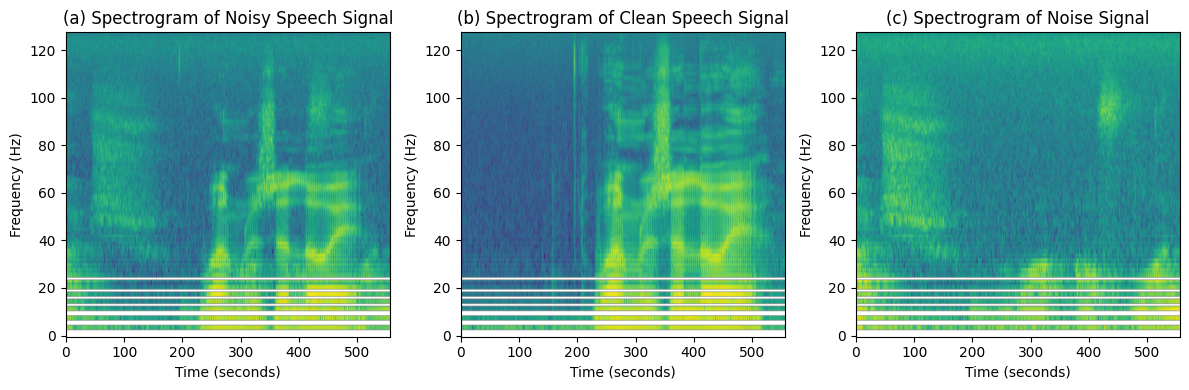

In [ ]:
import torchaudio
import torchaudio.transforms as transforms
import matplotlib.pyplot as plt
import torch

def plot_spectrogram(waveform, sample_rate, title, ax):
    """
    Compute and plot the spectrogram of a waveform.
    """
    spectrogram_transform = transforms.MelSpectrogram(
        sample_rate=sample_rate, n_mels=128, n_fft=512, hop_length=128
    )
    spectrogram = spectrogram_transform(waveform).log2()

    ax.imshow(spectrogram.squeeze().numpy(), aspect="auto", origin="lower")
    ax.set_title(title)
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Frequency (Hz)")

def generate_three_spectrograms(noisy_path, clean_path):
    """
    Load audio files and generate spectrograms for:
    (a) Noisy Speech
    (b) Clean Speech
    (c) Noise (Noisy - Clean)
    """
    # Load audio
    noisy_waveform, sample_rate = torchaudio.load(noisy_path)
    clean_waveform, _ = torchaudio.load(clean_path)

    # Ensure same length
    min_len = min(noisy_waveform.shape[1], clean_waveform.shape[1])
    noisy_waveform = noisy_waveform[:, :min_len]
    clean_waveform = clean_waveform[:, :min_len]

    # Compute noise signal
    noise_waveform = noisy_waveform - clean_waveform

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Plot noisy speech spectrogram
    plot_spectrogram(noisy_waveform, sample_rate, "(a) Spectrogram of Noisy Speech Signal", axes[0])

    # Plot clean speech spectrogram
    plot_spectrogram(clean_waveform, sample_rate, "(b) Spectrogram of Clean Speech Signal", axes[1])

    # Plot noise spectrogram
    plot_spectrogram(noise_waveform, sample_rate, "(c) Spectrogram of Noise Signal", axes[2])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Paths to audio files (replace with correct paths)
noisy_audio_path = "/content/drive/MyDrive/noisy_half1/p258_302.wav"
clean_audio_path = "/content/drive/MyDrive/clean_half1/p258_302.wav"

# Generate and display spectrograms
generate_three_spectrograms(noisy_audio_path, clean_audio_path)


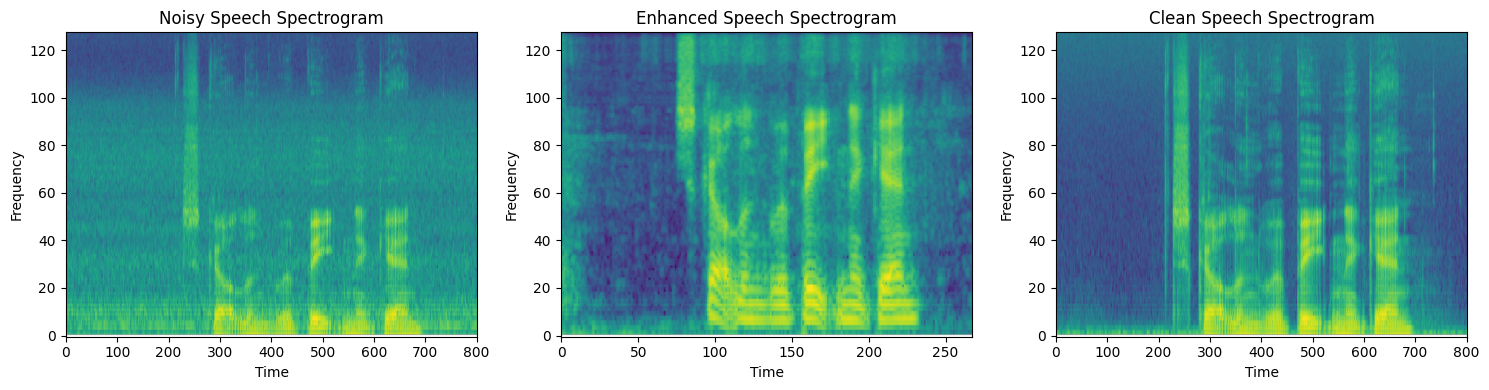

In [ ]:
import torch
import torchaudio
import torchaudio.transforms as transforms
import matplotlib.pyplot as plt

def plot_spectrogram(waveform, sample_rate, title, ax):
    """
    Compute and plot the spectrogram of a waveform.
    """
    # Convert waveform to tensor if it's numpy
    if isinstance(waveform, np.ndarray):
        waveform = torch.tensor(waveform)

    # Compute the spectrogram
    spectrogram_transform = transforms.MelSpectrogram(
        sample_rate=sample_rate, n_mels=128, n_fft=512, hop_length=128
    )
    spectrogram = spectrogram_transform(waveform).log2()

    # Plot spectrogram
    ax.imshow(spectrogram.squeeze().numpy(), aspect="auto", origin="lower")
    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency")

def compare_spectrograms(noisy_path, enhanced_path, clean_path, sample_rate=16000):
    """
    Load noisy, enhanced, and clean audio files and plot their spectrograms side by side.
    """
    # Load audio files
    noisy_waveform, _ = torchaudio.load(noisy_path)
    enhanced_waveform, _ = torchaudio.load(enhanced_path)
    clean_waveform, _ = torchaudio.load(clean_path)

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Noisy speech spectrogram
    plot_spectrogram(noisy_waveform, sample_rate, "Noisy Speech Spectrogram", axes[0])

    # Enhanced speech spectrogram
    plot_spectrogram(enhanced_waveform, sample_rate, "Enhanced Speech Spectrogram", axes[1])

    # Clean speech spectrogram
    plot_spectrogram(clean_waveform, sample_rate, "Clean Speech Spectrogram", axes[2])

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Paths to your audio files
noisy_audio_path = "/content/drive/MyDrive/noisy_half1/p258_314.wav"
enhanced_audio_path = "/content/enhanced_audio.wav"
clean_audio_path = "/content/drive/MyDrive/clean_half1/p258_314.wav"  # Add clean speech path

# Plot the spectrograms for comparison
compare_spectrograms(noisy_audio_path, enhanced_audio_path, clean_audio_path)


In [ ]:
!pip install torchaudio transformers librosa


In [ ]:
!git clone https://github.com/jik876/hifi-gan.git
!cd hifi-gan

Cloning into 'hifi-gan'...
remote: Enumerating objects: 48, done.
remote: Total 48 (delta 0), reused 0 (delta 0), pack-reused 48 (from 1)
Receiving objects: 100% (48/48), 620.94 KiB | 2.08 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
!wget -O generator_v1.pth "https://huggingface.co/facebook/hifi-gan/resolve/main/generator_v1.pth"

--2025-03-14 10:42:41--  https://huggingface.co/facebook/hifi-gan/resolve/main/generator_v1.pth
Resolving huggingface.co (huggingface.co)... 18.164.174.17, 18.164.174.118, 18.164.174.55, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.17|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized

Username/Password Authentication Failed.


In [ ]:
import torch
import torchaudio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

# Load the pretrained Wav2Vec2 model
def load_wav2vec():
    model_name = "facebook/wav2vec2-large-960h"  # Pretrained ASR model
    processor = Wav2Vec2Processor.from_pretrained(model_name)
    model = Wav2Vec2ForCTC.from_pretrained(model_name)
    model.eval()
    return processor, model

# Apply Wav2Vec2 for speech refinement
def apply_wav2vec_postfilter(enhanced_audio_path):
    """
    Use Wav2Vec2 to improve speech clarity of the enhanced audio.
    """
    print("Applying Wav2Vec2 Post-Processing...")

    # Load enhanced speech
    waveform, sr = torchaudio.load(enhanced_audio_path)

    # Load Wav2Vec2 processor and model
    processor, model = load_wav2vec()

    # Convert waveform to input features
    input_values = processor(waveform.squeeze(0), return_tensors="pt", sampling_rate=sr).input_values

    # Get model predictions
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode speech
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)

    # Save refined speech
    refined_audio_path = enhanced_audio_path.replace(".wav", "_refined.txt")
    with open(refined_audio_path, "w") as f:
        f.write(transcription[0])

    print(f"✔️ Refined transcription saved to: {refined_audio_path}")
    return transcription[0]


In [ ]:
import sys
import torch
import torchaudio
import numpy as np

# Add necessary paths
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet")
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet/recipes/intel_ndns/spiking_fullsubnet_freeze_phase/")

# Import relevant modules
from audiozen.acoustics.audio_feature import (
    load_wav, stft, mag_phase, loudness_rms_norm, norm_amplitude, istft
)
from audiozen.acoustics.filterbank import bark_filter_bank
from audiozen.models.spiking_fullsubnet.modeling_spiking_fullsubnet import SpikingFullSubNet
from recipes.intel_ndns.spiking_fullsubnet_freeze_phase.model_low_freq import Separator

# Loudness Normalization Function
def normalize_audio(waveform):
    """
    Normalize waveform using loudness normalization.
    """
    waveform, _ = loudness_rms_norm(waveform.numpy())  # Apply RMS normalization
    return torch.tensor(waveform, dtype=torch.float32)

# Preprocess audio
def preprocess_audio(audio_path):
    """
    Load and preprocess audio file with normalization.
    """
    print(f"Processing audio: {audio_path}")
    waveform = load_wav(audio_path, sr=16000)
    if waveform.ndim == 1:
        waveform = np.expand_dims(waveform, axis=0)
    waveform = torch.tensor(waveform, dtype=torch.float32)
    waveform = normalize_audio(waveform)
    return waveform

# Load the Spiking FullSubNet model
def load_spiking_fullsubnet():
    """
    Load pretrained Spiking FullSubNet model.
    """
    model = Separator(
        sr=16000,
        fdrc=0.5,
        n_fft=512,
        fb_freqs=64,
        hop_length=128,
        win_length=512,
        num_freqs=256,
        sequence_model="GSU",
        fb_hidden_size=320,
        fb_output_activate_function=False,
        freq_cutoffs=[32, 128, 192],
        sb_df_orders=[5, 3, 1, 1],
        sb_num_center_freqs=[2, 4, 32, 64],
        sb_num_neighbor_freqs=[15, 15, 15, 15],
        fb_num_center_freqs=[2, 4, 32, 64],
        fb_num_neighbor_freqs=[0, 0, 0, 0],
        sb_hidden_size=256,
        sb_output_activate_function=False,
        norm_type="offline_laplace_norm",
        shared_weights=True,
        bn=True,
    )

    model_path = "/content/drive/MyDrive/spiking-fullsubnet/model_zoo/intel_ndns/spike_fsb/baseline_l/checkpoints/best/pytorch_model.bin"
    state_dict = torch.load(model_path, map_location="cpu")

    # Check for missing keys
    missing_keys, unexpected_keys = model.load_state_dict(state_dict, strict=False)
    if missing_keys:
        print(f"⚠️ Missing keys in state_dict: {missing_keys}")
    if unexpected_keys:
        print(f"⚠️ Unexpected keys in state_dict: {unexpected_keys}")

    model.eval()
    return model

# Run inference
def run_inference(audio_path):
    """
    Run inference on input audio file.
    """
    waveform = preprocess_audio(audio_path)
    model = load_spiking_fullsubnet()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    waveform = waveform.to(device)

    with torch.no_grad():
        enhanced_y, enhanced_mag, _, _ = model(waveform)

    return enhanced_y.cpu(), 16000

# Save and play enhanced audio
def save_and_play_audio(waveform, sample_rate, output_path="enhanced_audio.wav"):
    """
    Save enhanced audio and provide playback.
    """
    if waveform.ndim == 1:
        waveform = waveform.unsqueeze(0)  # Ensure correct shape for torchaudio.save

    torchaudio.save(output_path, waveform, sample_rate)
    print(f"Enhanced audio saved to {output_path}")

    from IPython.display import Audio
    return Audio(output_path, rate=sample_rate)

# Main pipeline
def main(audio_path):
    """
    Main function to run the pipeline.
    """
    enhanced_waveform, sample_rate = run_inference(audio_path)
    return save_and_play_audio(enhanced_waveform, sample_rate)

# Run the pipeline
audio_path = "/content/drive/MyDrive/noisy_half1/p258_315.wav"
main(audio_path)




import torch
import numpy as np

def si_snr(reference, estimation, eps=1e-8):
    """
    Compute Scale-Invariant Signal-to-Noise Ratio (SI-SNR)
    """
    reference = reference - torch.mean(reference, dim=-1, keepdim=True)
    estimation = estimation - torch.mean(estimation, dim=-1, keepdim=True)

    reference_energy = torch.sum(reference ** 2, dim=-1, keepdim=True) + eps
    projection = torch.sum(reference * estimation, dim=-1, keepdim=True) * reference / reference_energy
    noise = estimation - projection

    si_snr_value = 10 * torch.log10(torch.sum(projection ** 2, dim=-1) / (torch.sum(noise ** 2, dim=-1) + eps))
    return si_snr_value.mean()

def compute_si_snr(audio_path):
    """
    Compute SI-SNR and SI-SNRi before and after enhancement.
    """
    # Load noisy audio
    noisy_waveform = preprocess_audio(audio_path)

    # Run inference to get enhanced audio
    enhanced_waveform, _ = run_inference(audio_path)

    # Load clean audio (assumed to be in dataset)
    clean_audio_path = audio_path.replace("noisy_", "clean_")  # Modify based on dataset structure
    clean_waveform = preprocess_audio(clean_audio_path)

    # Compute SI-SNR before enhancement
    si_snr_before = si_snr(clean_waveform, noisy_waveform)

    # Compute SI-SNR after enhancement
    si_snr_after = si_snr(clean_waveform, enhanced_waveform)

    # SI-SNR Improvement (SI-SNRi)
    si_snri = si_snr_after - si_snr_before

    print(f"SI-SNR Before Enhancement: {si_snr_before:.2f} dB")
    print(f"SI-SNR After Enhancement: {si_snr_after:.2f} dB")
    print(f"SI-SNR Improvement (SI-SNRi): {si_snri:.2f} dB")

    return si_snr_after, si_snri

# Run SI-SNR calculation
compute_si_snr(audio_path)




import sys
import torch
import numpy as np
import onnxruntime as ort
import librosa
import soundfile as sf
from tqdm import tqdm

# Add the necessary paths to sys.path
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet")
sys.path.append("/content/drive/MyDrive/spiking-fullsubnet/recipes/intel_ndns/spiking_fullsubnet_freeze_phase/")

# Constants
SAMPLING_RATE = 16000
INPUT_LENGTH = 9.01  # Length of audio segments in seconds

class ComputeScore:
    def __init__(self, primary_model_path, p808_model_path) -> None:
        self.onnx_sess = ort.InferenceSession(primary_model_path)
        self.p808_onnx_sess = ort.InferenceSession(p808_model_path)

    def audio_melspec(self, audio, n_mels=120, frame_size=320, hop_length=160, sr=16000, to_db=True):
        mel_spec = librosa.feature.melspectrogram(
            y=audio, sr=sr, n_fft=frame_size + 1, hop_length=hop_length, n_mels=n_mels
        )
        if to_db:
            mel_spec = (librosa.power_to_db(mel_spec, ref=np.max) + 40) / 40
        return mel_spec.T

    def get_polyfit_val(self, sig, bak, ovr, is_personalized_MOS):
        if is_personalized_MOS:
            p_ovr = np.poly1d([-0.00533021, 0.005101, 1.18058466, -0.11236046])
            p_sig = np.poly1d([-0.01019296, 0.02751166, 1.19576786, -0.24348726])
            p_bak = np.poly1d([-0.04976499, 0.44276479, -0.1644611, 0.96883132])
        else:
            p_ovr = np.poly1d([-0.06766283, 1.11546468, 0.04602535])
            p_sig = np.poly1d([-0.08397278, 1.22083953, 0.0052439])
            p_bak = np.poly1d([-0.13166888, 1.60915514, -0.39604546])

        sig_poly = p_sig(sig)
        bak_poly = p_bak(bak)
        ovr_poly = p_ovr(ovr)
        return sig_poly, bak_poly, ovr_poly

    def __call__(self, fpath, sampling_rate, is_personalized_MOS):
        aud, input_fs = sf.read(fpath)
        fs = sampling_rate
        if input_fs != fs:
            audio = librosa.resample(aud, orig_sr=input_fs, target_sr=fs)
        else:
            audio = aud

        len_samples = int(INPUT_LENGTH * fs)
        while len(audio) < len_samples:
            audio = np.append(audio, audio)

        num_hops = int(np.floor(len(audio) / fs) - int(INPUT_LENGTH) + 1)
        hop_len_samples = fs

        predicted_mos_ovr_seg_raw = []
        predicted_mos_sig_seg_raw = []
        predicted_mos_bak_seg_raw = []
        predicted_p808_mos = []

        for idx in range(num_hops):
            audio_seg = audio[int(idx * hop_len_samples): int((idx + INPUT_LENGTH) * hop_len_samples)]
            if len(audio_seg) < len_samples:
                continue

            input_features = np.array(audio_seg).astype("float32")[np.newaxis, :]
            p808_input_features = np.array(self.audio_melspec(audio=audio_seg[:-160])).astype("float32")[np.newaxis, :, :]

            oi = {"input_1": input_features}
            p808_oi = {"input_1": p808_input_features}
            p808_mos = self.p808_onnx_sess.run(None, p808_oi)[0][0][0]
            mos_sig_raw, mos_bak_raw, mos_ovr_raw = self.onnx_sess.run(None, oi)[0][0]

            predicted_mos_ovr_seg_raw.append(mos_ovr_raw)
            predicted_mos_sig_seg_raw.append(mos_sig_raw)
            predicted_mos_bak_seg_raw.append(mos_bak_raw)
            predicted_p808_mos.append(p808_mos)

        clip_dict = {
            "filename": fpath,
            "OVRL_raw": np.mean(predicted_mos_ovr_seg_raw),
            "SIG_raw": np.mean(predicted_mos_sig_seg_raw),
            "BAK_raw": np.mean(predicted_mos_bak_seg_raw),
            "P808_MOS": np.mean(predicted_p808_mos),
        }
        return clip_dict


def main(noisy_audio_path, enhanced_audio_path):
    sig_bak_ovr_path = "/content/drive/MyDrive/spiking-fullsubnet/audiozen/external/DNSMOS/sig_bak_ovr.onnx"
    model_v8_path = "/content/drive/MyDrive/spiking-fullsubnet/audiozen/external/DNSMOS/model_v8.onnx"

    compute_score = ComputeScore(sig_bak_ovr_path, model_v8_path)

    print("Calculating DNSMOS for the noisy input audio...")
    noisy_scores = compute_score(noisy_audio_path, SAMPLING_RATE, is_personalized_MOS=False)

    print("Calculating DNSMOS for the enhanced output audio...")
    enhanced_scores = compute_score(enhanced_audio_path, SAMPLING_RATE, is_personalized_MOS=False)

    print("\nComparison of DNSMOS Scores:")
    print(f"  Noisy Audio - OVRL: {noisy_scores['OVRL_raw']}, SIG: {noisy_scores['SIG_raw']}, BAK: {noisy_scores['BAK_raw']}")
    print(f"  Enhanced Audio - OVRL: {enhanced_scores['OVRL_raw']}, SIG: {enhanced_scores['SIG_raw']}, BAK: {enhanced_scores['BAK_raw']}")

# Example usage
noisy_audio_path = "/content/drive/MyDrive/noisy_half1/p258_314.wav"
enhanced_audio_path = "/content/enhanced_audio.wav"
main(noisy_audio_path, enhanced_audio_path)



Processing audio: /content/drive/MyDrive/noisy_half1/p258_315.wav


<ipython-input-33-8cb9c008effc>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location="cpu")


Enhanced audio saved to enhanced_audio.wav
Applying Wav2Vec2 Post-Processing...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✔️ Refined transcription saved to: enhanced_audio_refined.txt

🔹 Refined Speech Transcription: THEY WERE FANTASTIC
Processing audio: /content/drive/MyDrive/noisy_half1/p258_315.wav
Processing audio: /content/drive/MyDrive/noisy_half1/p258_315.wav
Processing audio: /content/drive/MyDrive/clean_half1/p258_315.wav
SI-SNR Before Enhancement: 7.89 dB
SI-SNR After Enhancement: 14.45 dB
SI-SNR Improvement (SI-SNRi): 6.56 dB
Calculating DNSMOS for the noisy input audio...
Calculating DNSMOS for the enhanced output audio...

Comparison of DNSMOS Scores:
  Noisy Audio - OVRL: 2.6617507934570312, SIG: 3.4628372192382812, BAK: 2.9113152027130127
  Enhanced Audio - OVRL: 2.8887739181518555, SIG: 3.0796165466308594, BAK: 4.015182018280029
